# User Behavior Analysis

**Author: Amrita Veshin**


## Importing Libraries

In [1]:
# Install libraries (if not pre-installed in Colab)
!pip install faker seaborn

# Import Libraries
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Set styles
sns.set(style="whitegrid")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00


## Generating Synthetic Data Using Faker  

In [2]:
fake = Faker()
Faker.seed(49)
np.random.seed(49)

def generate_user_data(num_users=10000):
    user_data = []

    for user_id in range(1, num_users + 1):
        user = {
            "user_id": user_id,
            "signup_date": fake.date_between(start_date='-6M', end_date='today'),
            "age": np.random.randint(18, 65),
            "location": fake.country(),
            "device": random.choice(["Mobile", "Desktop", "Tablet"]),
            "traffic_source": random.choice(["Organic", "Paid", "Referral", "Direct"]),
            "pages_visited": np.random.poisson(5),
            "session_duration": np.random.exponential(10),  # in minutes
            "converted": np.random.choice([0, 1], p=[0.8, 0.2])
        }
        user_data.append(user)

    return pd.DataFrame(user_data)

df = generate_user_data()
df.head()


,user_id,signup_date,age,location,device,traffic_source,pages_visited,session_duration,converted
0,1,2024-12-24,60,Isle of Man,Mobile,Direct,5,13.460734,0
1,2,2025-05-31,36,Gibraltar,Tablet,Direct,8,3.422620,0
2,3,2025-04-28,49,Malawi,Tablet,Organic,6,4.047382,0
3,4,2025-05-08,27,Pitcairn Islands,Tablet,Direct,11,6.546032,0
4,5,2024-12-20,60,Saint Pierre and Miquelon,Tablet,Organic,1,44.467106,1


In [9]:
df.tail()

,user_id,signup_date,age,location,device,traffic_source,pages_visited,session_duration,converted,signup_month
995,996,2025-01-03,24,Swaziland,Desktop,Organic,8,30.007745,0,2025-01
996,997,2025-04-11,19,Guinea-Bissau,Desktop,Paid,7,3.564609,0,2025-04
997,998,2025-03-19,57,Zimbabwe,Desktop,Referral,6,8.549814,0,2025-03
998,999,2024-12-22,34,Costa Rica,Desktop,Direct,5,25.586863,0,2024-12
999,1000,2025-02-22,55,Antigua and Barbuda,Tablet,Paid,8,3.381724,1,2025-02


## Exploratory Data Analysis (EDA)

In [16]:
df.isna().sum()

,0
user_id,0
signup_date,0
age,0
location,0
device,0
traffic_source,0
pages_visited,0
session_duration,0
converted,0
signup_month,0


In [19]:
print(df.shape)

(1000, 10)


In [20]:
print(df.size)

10000


In [18]:
df.describe()

,user_id,age,pages_visited,session_duration,converted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.711000,4.993000,9.888529,0.201000
std,288.819436,13.601783,2.217627,9.676504,0.400949
min,1.000000,18.000000,0.000000,0.003579,0.000000
25%,250.750000,29.000000,3.000000,2.900443,0.000000
50%,500.500000,40.000000,5.000000,6.565890,0.000000
75%,750.250000,52.000000,6.000000,14.316318,0.000000
max,1000.000000,64.000000,13.000000,65.739201,1.000000


### Distribution of Number of Pages Visited by Users

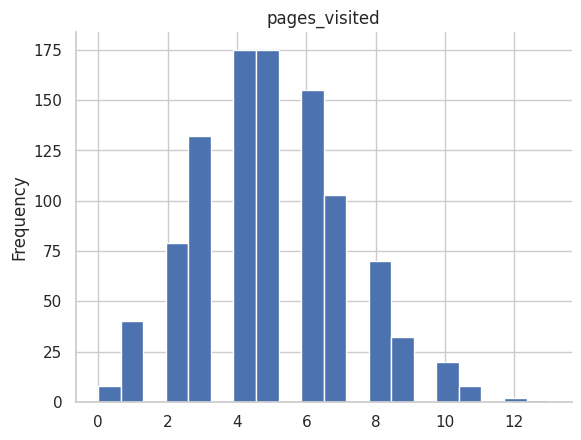

In [13]:
# number of pages_visited by users

from matplotlib import pyplot as plt
df['pages_visited'].plot(kind='hist', bins=20, title='pages_visited')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Device Usage Comparison

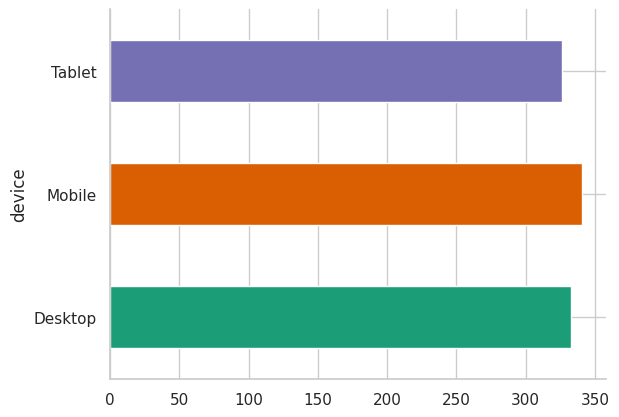

In [12]:
# comparison between device usage by users

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('device').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Traffic Source Comparison

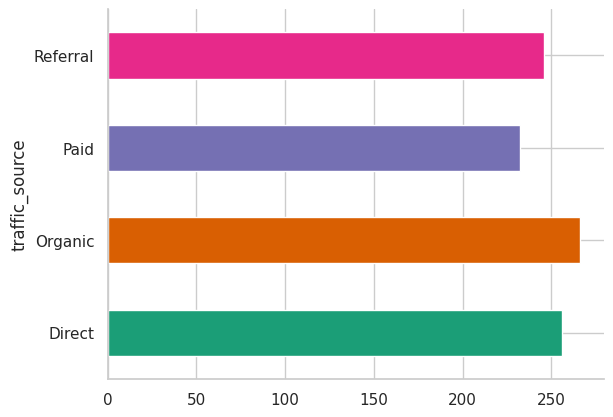

In [15]:
# traffic_source

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('traffic_source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Proportion of Conversions

In [21]:
df['converted'].value_counts(normalize=True)


,proportion
converted,
0,0.799
1,0.201


### Conversions by Traffic Source

Text(0.5, 1.0, 'Conversion Rate by Traffic Source')

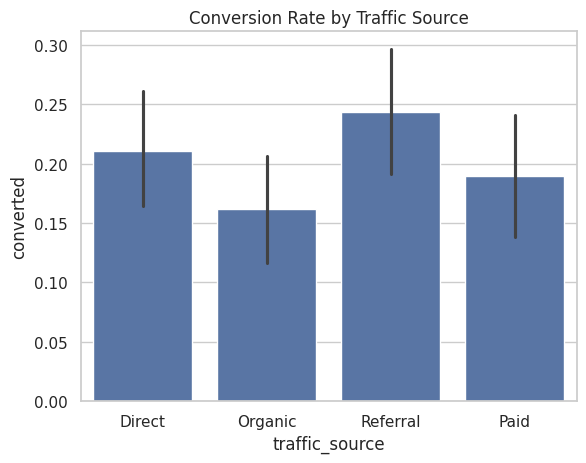

In [4]:
sns.barplot(x='traffic_source', y='converted', data=df)
plt.title('Conversion Rate by Traffic Source')


### Session Duration by Device Type

Text(0.5, 1.0, 'Session Duration by Device')

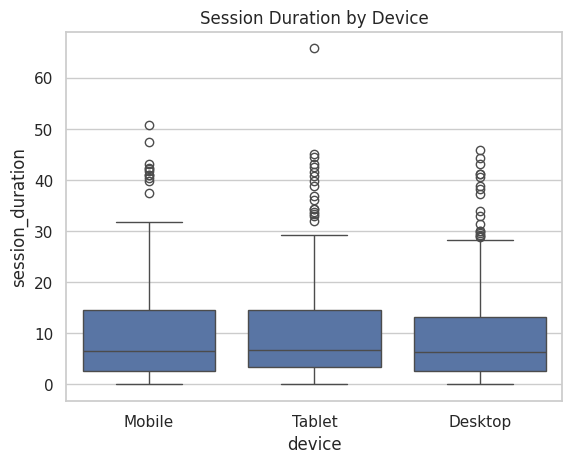

In [5]:
sns.boxplot(x='device', y='session_duration', data=df)
plt.title('Session Duration by Device')


### Conversions By Age

Text(0.5, 1.0, 'Age Distribution by Conversion Status')

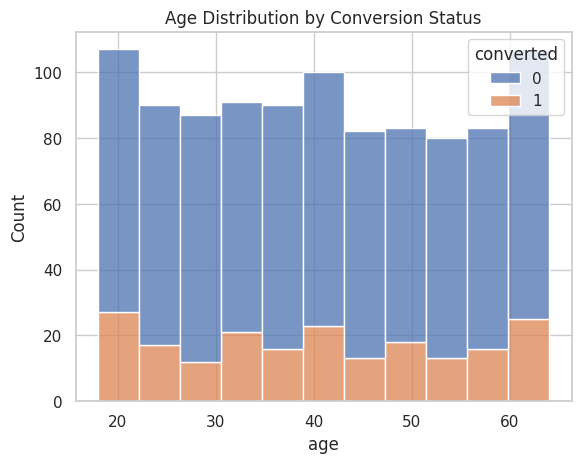

In [6]:
sns.histplot(data=df, x='age', hue='converted', multiple='stack')
plt.title('Age Distribution by Conversion Status')


## Cohort Analysis

### Monthly Conversion Rate Trend

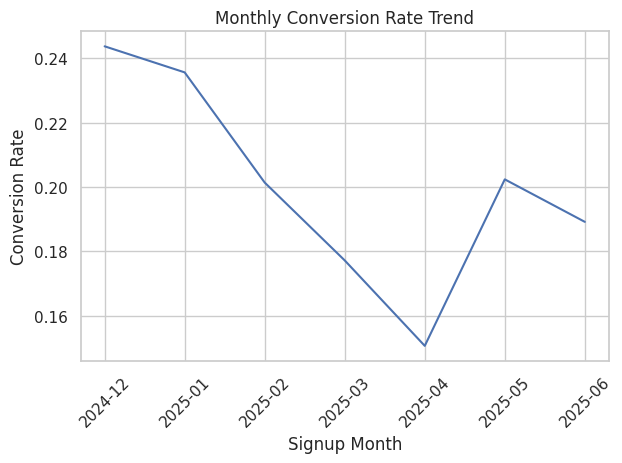

In [8]:
df['signup_month'] = pd.to_datetime(df['signup_date']).dt.to_period('M')
# Convert Period to string
cohort_df['signup_month'] = cohort_df['signup_month'].astype(str)
cohort_df = df.groupby('signup_month').agg({
    'user_id': 'nunique',
    'converted': 'sum'
}).reset_index()

cohort_df['conversion_rate'] = cohort_df['converted'] / cohort_df['user_id']

# Now plot
sns.lineplot(x='signup_month', y='conversion_rate', data=cohort_df)
plt.xticks(rotation=45)
plt.title('Monthly Conversion Rate Trend')
plt.ylabel('Conversion Rate')
plt.xlabel('Signup Month')
plt.tight_layout()
plt.show()


In [22]:
df.head()

,user_id,signup_date,age,location,device,traffic_source,pages_visited,session_duration,converted,signup_month
0,1,2024-12-24,60,Isle of Man,Mobile,Direct,5,13.460734,0,2024-12
1,2,2025-05-31,36,Gibraltar,Tablet,Direct,8,3.422620,0,2025-05
2,3,2025-04-28,49,Malawi,Tablet,Organic,6,4.047382,0,2025-04
3,4,2025-05-08,27,Pitcairn Islands,Tablet,Direct,11,6.546032,0,2025-05
4,5,2024-12-20,60,Saint Pierre and Miquelon,Tablet,Organic,1,44.467106,1,2024-12


In [23]:
df.to_csv("synthetic_user_data.csv", index=False)